## Uncertainty analysis


**US-Ho1**: https://ameriflux.lbl.gov/sites/siteinfo/US-Ho1

In [1]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy
from scipy import stats
from netCDF4 import Dataset

print('numpy version',np.__version__)
print('scipy version',scipy.__version__)

numpy version 1.19.2
scipy version 1.6.2


### Function of confidence interval

In [36]:
def lower_bound(df):
    alpha = 0.05
    return df.mean() - stats.t.ppf(1-alpha/2, df.shape[0]-1) * df.std(ddof=1)/np.sqrt(df.shape[0])

def upper_bound(df):
    alpha = 0.05
    return df.mean() + stats.t.ppf(1-alpha/2, df.shape[0]-1) * df.std(ddof=1)/np.sqrt(df.shape[0])
    
def confi_interval(var):
    lower = np.apply_along_axis(lower_bound,0,var)
    upper = np.apply_along_axis(upper_bound,0,var)
    
    return lower,upper

## Data with descending partitioning pattern

In [55]:
# US-SPR
df_1R = Dataset('1R_default.nc','r')
df_3R = Dataset('3R_default_descend.nc','r')   #Bin's version w/o root phenology
df_3R

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): pft(1), orders(3), soil(10), lon(1), lat(1), ensemble(160), time(8395)
    variables(dimensions): float64 frootlong_t(ensemble, pft), float64 frootlong_a(ensemble, pft), float64 frootlong_m(ensemble, pft), float64 fr_flab_t(ensemble, pft), float64 fr_flab_a(ensemble, pft), float64 fr_flab_m(ensemble, pft), float64 fr_flig_t(ensemble, pft), float64 fr_flig_a(ensemble, pft), float64 fr_flig_m(ensemble, pft), float64 fr_fcel_t(ensemble, pft), float64 fr_fcel_a(ensemble, pft), float64 fr_fcel_m(ensemble, pft), float64 mort_depth_efolding(ensemble, pft), float32 pft_frac(lat, lon, pft), float64 time(time), float32 gpp_pft(ensemble, pft, time, lat, lon), float32 npp_pft(ensemble, pft, time, lat, lon), float32 gr_pft(ensemble, pft, time, lat, lon), float32 mr_pft(ensemble, pft, time, lat, lon), float32 hr(ensemble, time, lat, lon), float32 nee(ensemble, time, lat, lon), float32 lai_pft

In [4]:
df_3R.variables['frootlong_t'][:]

masked_array(
  data=[[9.17644518],
        [9.59892877],
        [5.42097208],
        [8.01855577],
        [9.49730406],
        [6.43031054],
        [3.99730398],
        [4.97068021],
        [7.83448461],
        [4.06323805],
        [4.16469024],
        [8.20919605],
        [5.94770469],
        [9.94257517],
        [3.97309141],
        [9.59024787],
        [5.18700432],
        [5.23425521],
        [5.87161976],
        [7.02205755],
        [3.36058205],
        [6.82882838],
        [5.58790652],
        [4.69222867],
        [3.59418829],
        [8.8000231 ],
        [7.2482457 ],
        [4.00421152],
        [8.21854654],
        [7.30254642],
        [8.48303351],
        [6.28456538]],
  mask=False,
  fill_value=1e+20)

In [5]:
df_3R.variables['frootlong_a'][:]

masked_array(
  data=[[0.86514708],
        [2.6355666 ],
        [1.91310401],
        [3.87425022],
        [2.22441999],
        [0.51062562],
        [1.16323958],
        [3.39783766],
        [3.52660459],
        [1.58600123],
        [3.78427937],
        [1.42044696],
        [2.31701131],
        [0.51406402],
        [3.84612711],
        [1.95420945],
        [3.42436792],
        [3.6786378 ],
        [3.9857021 ],
        [3.96925242],
        [2.4422289 ],
        [0.73338954],
        [3.20041251],
        [1.61736156],
        [1.9453053 ],
        [2.99640718],
        [1.82865459],
        [0.88267681],
        [3.85333919],
        [3.17907814],
        [2.94773996],
        [0.58260295]],
  mask=False,
  fill_value=1e+20)

In [6]:
df_3R.variables['frootlong_m'][:]

masked_array(
  data=[[0.91909812],
        [0.3279924 ],
        [0.24952324],
        [0.59954062],
        [0.33567412],
        [0.86398607],
        [0.48200395],
        [0.13786167],
        [0.56145501],
        [0.83378169],
        [0.95413789],
        [0.8765605 ],
        [0.85252692],
        [0.5959243 ],
        [0.30887985],
        [0.19752221],
        [0.92838178],
        [0.53294753],
        [0.69600577],
        [0.1625517 ],
        [0.24634042],
        [0.25618984],
        [0.87084677],
        [0.22353895],
        [0.39770221],
        [0.54022911],
        [0.61527046],
        [0.3928949 ],
        [0.68783493],
        [0.64425039],
        [0.8479736 ],
        [0.71729943]],
  mask=False,
  fill_value=1e+20)

## GPP

In [46]:
######################Data########################
pft = int(0)
gpp_pft_elm = df_1R.variables['gpp_pft'][:].squeeze()[:]
gpp_pft_tam = df_3R.variables['gpp_pft'][:].squeeze()[:]
gpp_interval= confi_interval(gpp_pft_tam)

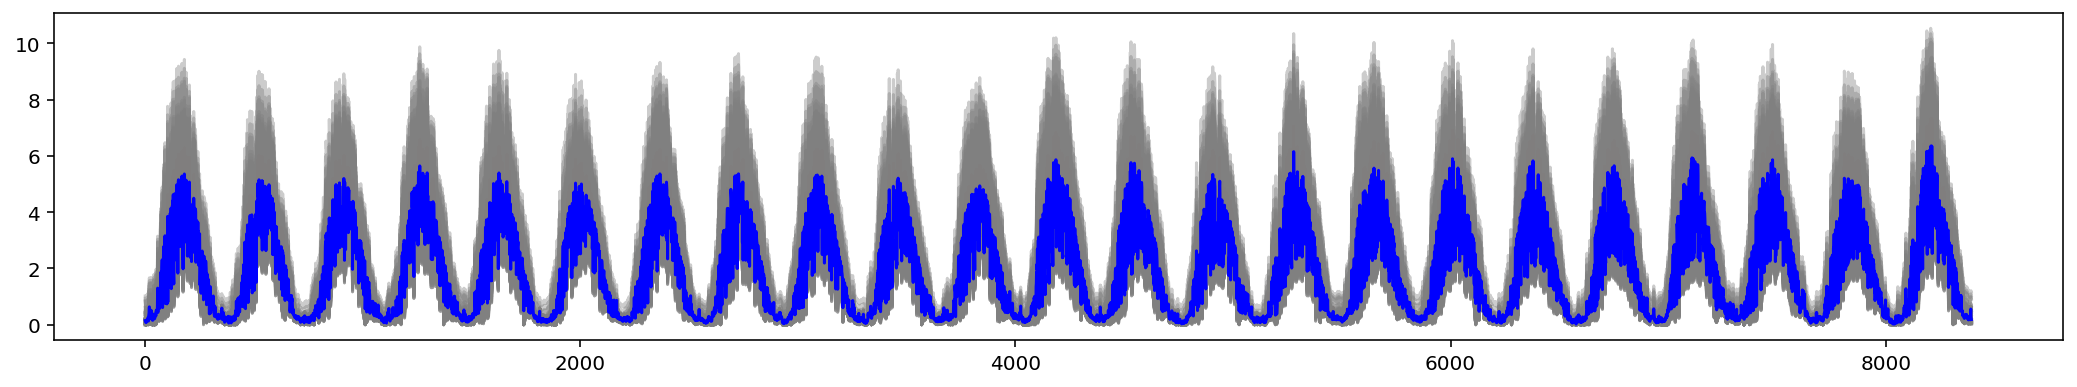

In [47]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
ax.plot(gpp_pft_elm,c='red')
#TAM
for i in range(gpp_pft_tam.shape[0]):
    ax.plot(gpp_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(gpp_pft_tam[:,:].mean(axis=0),color='blue')
ax.fill_between(x=range(gpp_pft_tam.shape[1]), y1=gpp_interval[0],y2=gpp_interval[1],facecolor='blue', alpha=0.5)

plt.show()

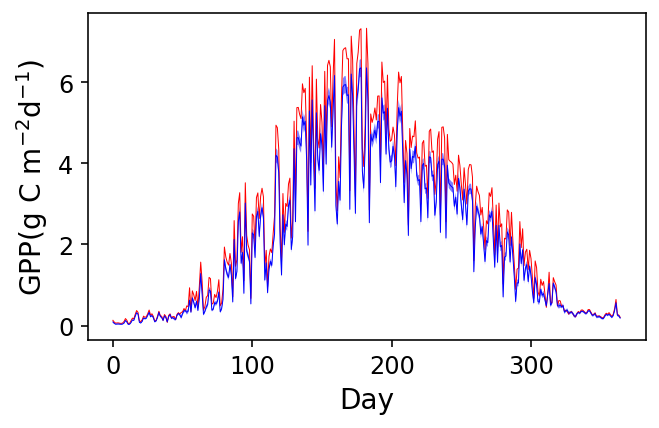

In [48]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(gpp_pft_elm[-365:],c='red',linewidth=0.5)
#TAM
#for i in range(lai_pft_tam.shape[0]):
#    ax.plot(lai_pft_tam[i,-365:],c='grey',alpha=0.4)

ax.plot(gpp_pft_tam[:,-365:].mean(axis=0),color='blue',linewidth=0.5)
ax.fill_between(x=range(gpp_pft_tam[:,-365:].shape[1]), y1=gpp_interval[0][-365:],y2=gpp_interval[1][-365:],facecolor='blue', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('GPP(g C m$^{-2}$d$^{-1}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

plt.savefig("gpp_1.pdf",bbox_inches='tight')

plt.show()

## LAI

In [56]:
######################Data########################
pft = int(0)
lai_pft_elm = df_1R.variables['lai_pft'][:].squeeze()[:]
lai_pft_tam = df_3R.variables['lai_pft'][:].squeeze()[:]
lai_interval= confi_interval(lai_pft_tam)

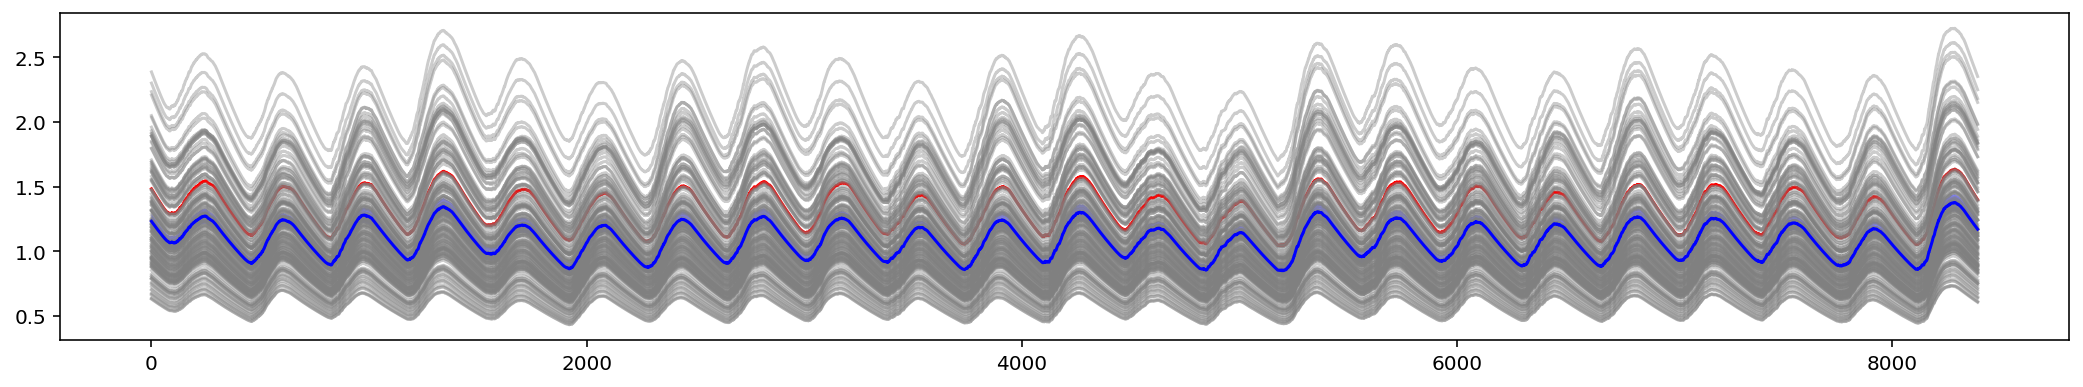

In [57]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
ax.plot(lai_pft_elm,c='red')
#TAM
for i in range(lai_pft_tam.shape[0]):
    ax.plot(lai_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(lai_pft_tam[:,:].mean(axis=0),color='blue')
ax.fill_between(x=range(lai_pft_tam.shape[1]), y1=lai_interval[0],y2=lai_interval[1],facecolor='blue', alpha=0.5)

plt.show()

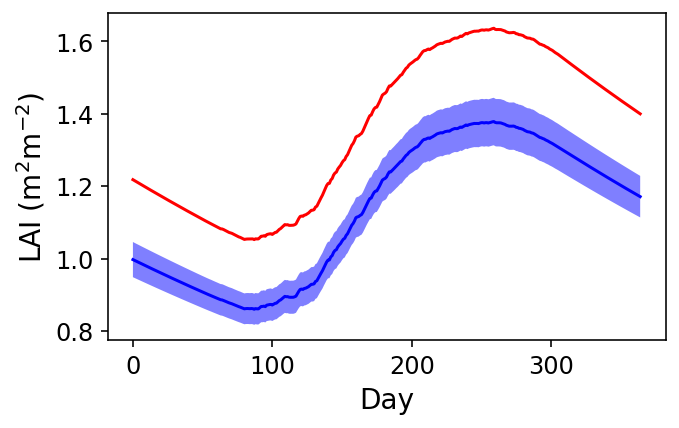

In [58]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(lai_pft_elm[-365:],c='red')
#TAM
#for i in range(lai_pft_tam.shape[0]):
#    ax.plot(lai_pft_tam[i,-365:],c='grey',alpha=0.4)

ax.plot(lai_pft_tam[:,-365:].mean(axis=0),color='blue')
ax.fill_between(x=range(lai_pft_tam[:,-365:].shape[1]), y1=lai_interval[0][-365:],y2=lai_interval[1][-365:],facecolor='blue', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('LAI (m$^2$m$^{-2}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

plt.show()

## Leaf

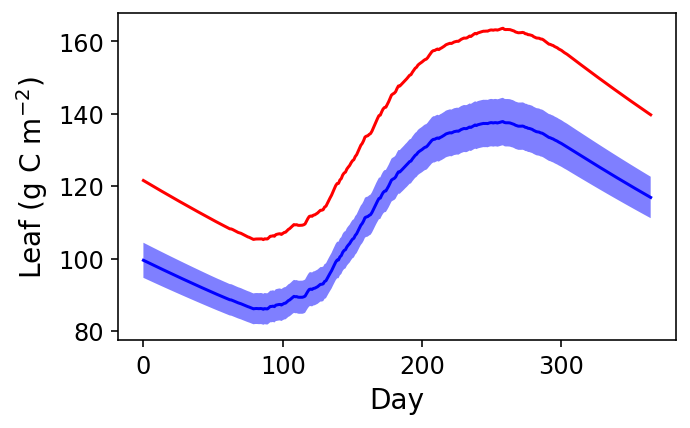

In [62]:
######################Data########################
pft = int(0)
leaf_pft_elm = df_1R.variables['leafc_pft'][:].squeeze()[:]
leaf_pft_tam = df_3R.variables['leafc_pft'][:].squeeze()[:]
leaf_interval= confi_interval(leaf_pft_tam)


fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(leaf_pft_elm[-365:],c='red')
#TAM
#for i in range(lai_pft_tam.shape[0]):
#    ax.plot(lai_pft_tam[i,-365:],c='grey',alpha=0.4)

ax.plot(leaf_pft_tam[:,-365:].mean(axis=0),color='blue')
ax.fill_between(x=range(leaf_pft_tam[:,-365:].shape[1]), y1=leaf_interval[0][-365:],y2=leaf_interval[1][-365:],facecolor='blue', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('Leaf (g C m$^{-2}$)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

plt.show()

## Fine root

In [49]:
######################Data########################
pft = int(0)
frootc_pft_elm = df_1R.variables['frootc_pft'][:].squeeze()[:]
frootc_pft_tam = df_3R.variables['frootc_pft'][:].squeeze()[:]
frootc_interval= confi_interval(frootc_pft_tam)

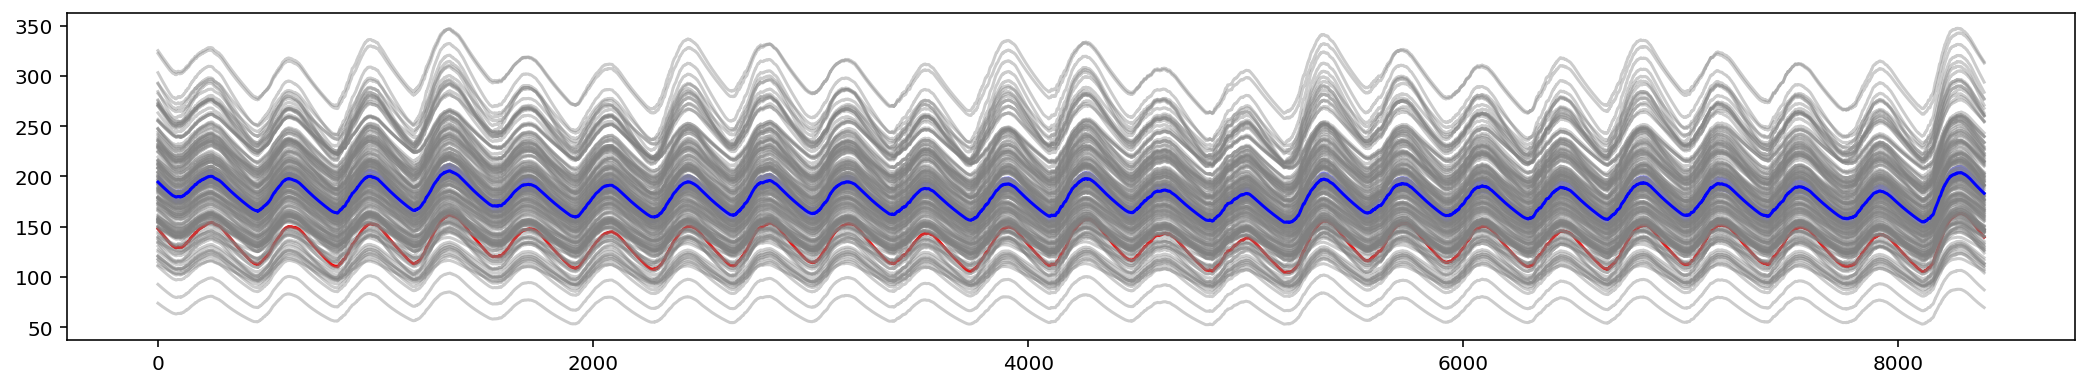

In [50]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
ax.plot(frootc_pft_elm,c='red')
#TAM
for i in range(frootc_pft_tam.shape[0]):
    ax.plot(frootc_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(frootc_pft_tam[:,:].mean(axis=0),color='blue')
ax.fill_between(x=range(frootc_pft_tam.shape[1]), y1=frootc_interval[0],y2=frootc_interval[1],facecolor='blue', alpha=0.5)

plt.show()

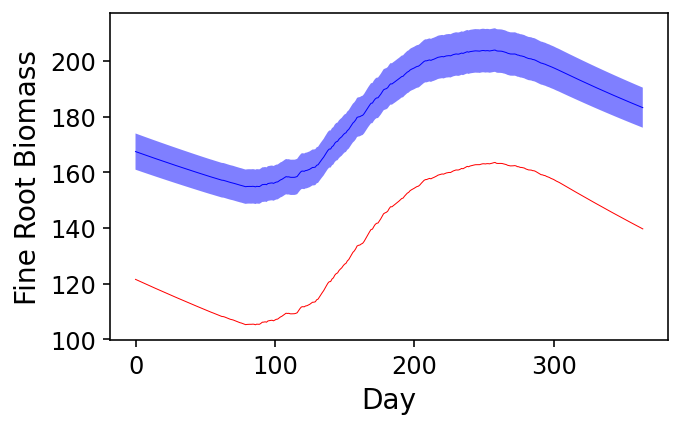

In [51]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(frootc_pft_elm[-365:],c='red',linewidth=0.5)
#TAM
# for i in range(lai_pft_tam.shape[0]):
#     ax.plot(lai_pft_tam[i,-365:],c='grey',alpha=0.4)

ax.plot(frootc_pft_tam[:,-365:].mean(axis=0),color='blue',linewidth=0.5)
ax.fill_between(x=range(frootc_pft_tam[:,-365:].shape[1]), y1=frootc_interval[0][-365:],y2=frootc_interval[1][-365:],facecolor='blue', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('Fine Root Biomass',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

plt.show()

## Litter C

In [59]:
######################Data########################
pft = int(0)
litter_elm = df_1R.variables['totlitc'][:].squeeze()[:]
litter_tam = df_3R.variables['totlitc'][:].squeeze()[:]
litter_interval= confi_interval(litter_tam)

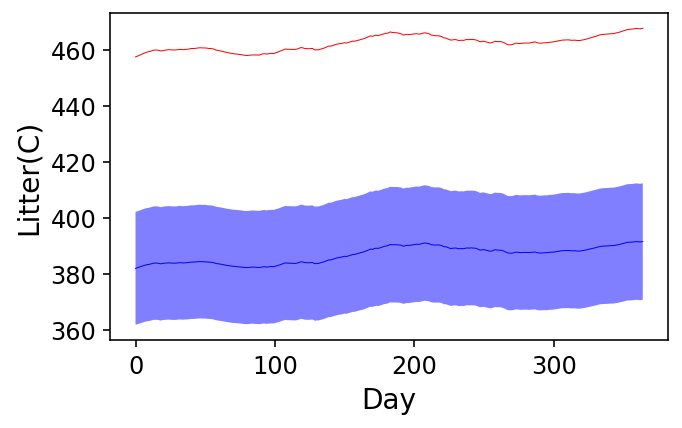

In [60]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(litter_elm[-365:],c='red',linewidth=0.5)
#TAM
# for i in range(lai_pft_tam.shape[0]):
#     ax.plot(lai_pft_tam[i,-365:],c='grey',alpha=0.4)

ax.plot(litter_tam[:,-365:].mean(axis=0),color='blue',linewidth=0.5)
ax.fill_between(x=range(litter_tam[:,-365:].shape[1]), y1=litter_interval[0][-365:],y2=litter_interval[1][-365:],facecolor='blue', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('Litter(C)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

plt.show()

## SOM

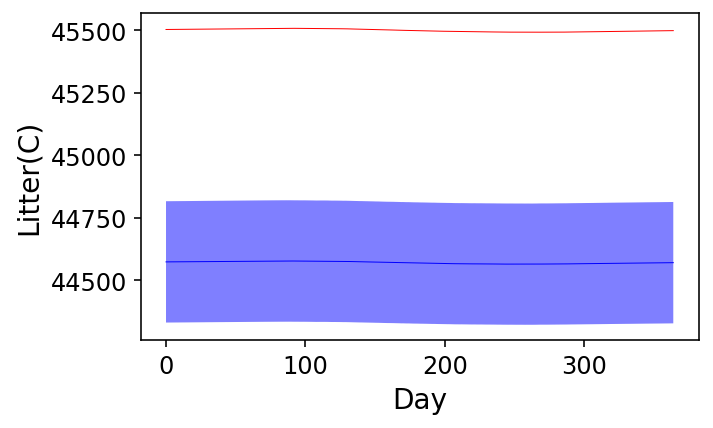

In [61]:
######################Data########################
pft = int(0)
som_elm = df_1R.variables['totsomc'][:].squeeze()[:]
som_tam = df_3R.variables['totsomc'][:].squeeze()[:]
som_interval= confi_interval(som_tam)


fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(som_elm[-365:],c='red',linewidth=0.5)
#TAM

ax.plot(som_tam[:,-365:].mean(axis=0),color='blue',linewidth=0.5)
ax.fill_between(x=range(som_tam[:,-365:].shape[1]), y1=som_interval[0][-365:],y2=som_interval[1][-365:],facecolor='blue', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('Litter(C)',size=14,weight='normal')
ax.tick_params('both',labelsize=12)

plt.show()

## Competition

### FPG

In [52]:
######################Data########################
pft = int(0)
fpg_pft_elm = df_1R.variables['fpg_pft'][:].squeeze()[:-1]
fpg_pft_tam = df_3R.variables['fpg_pft'][:].squeeze()[:,:-1]
fpg_interval= confi_interval(fpg_pft_tam)

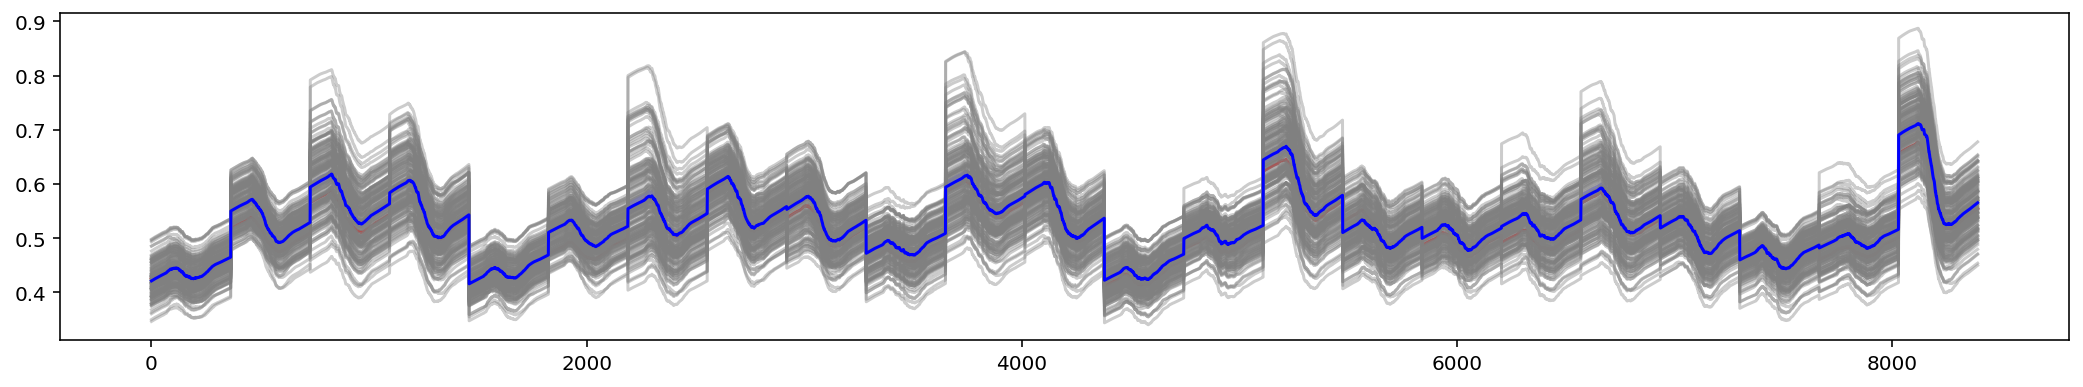

In [53]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
ax.plot(fpg_pft_elm,c='red')
#TAM
for i in range(fpg_pft_tam.shape[0]):
    ax.plot(fpg_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(fpg_pft_tam[:,:].mean(axis=0),color='blue')
ax.fill_between(x=range(fpg_pft_tam.shape[1]), y1=fpg_interval[0],y2=fpg_interval[1],facecolor='blue', alpha=0.5)

plt.show()

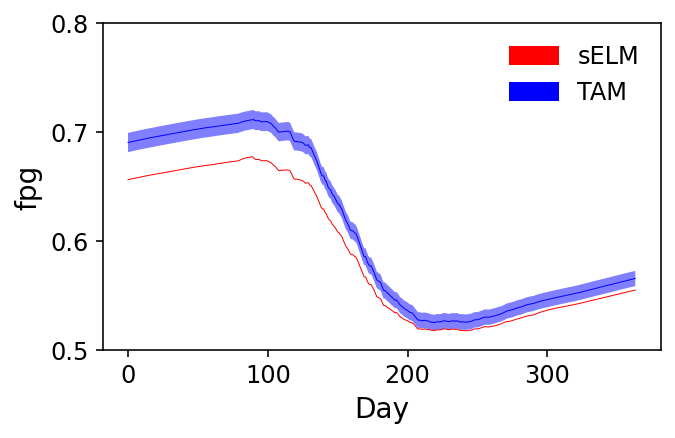

In [54]:
fig,ax = plt.subplots(1,1,figsize=(5,3))
#ELM
ax.plot(fpg_pft_elm[-364:],c='red',linewidth=0.5)
#TAM
# for i in range(lai_pft_tam.shape[0]):
#     ax.plot(lai_pft_tam[i,-365:],c='grey',alpha=0.4)

ax.plot(fpg_pft_tam[:,-364:].mean(axis=0),color='blue',linewidth=0.5)
ax.fill_between(x=range(fpg_pft_tam[:,-364:].shape[1]), y1=fpg_interval[0][-364:],y2=fpg_interval[1][-364:],facecolor='blue', alpha=0.5)

ax.set_xlabel('Day',size=14,weight='normal')
ax.set_ylabel('fpg',size=14,weight='normal')
ax.tick_params('both',labelsize=12)
ax.set_ylim(0.50,0.80)


#legend
red_patch = mpatches.Patch(color='red',label='sELM')
blu_patch = mpatches.Patch(color='blue',label='TAM')
ax.legend(handles=[red_patch,blu_patch],fontsize=12,frameon=False)

plt.savefig("fpg_1.pdf",bbox_inches='tight')

plt.show()

### FPI

In [12]:
df_3R.variables['fpi_vr'][:].squeeze().shape

(32, 10, 8395)

In [29]:
df_1R.variables['fpi_vr'][:].squeeze().shape

(10, 8395)

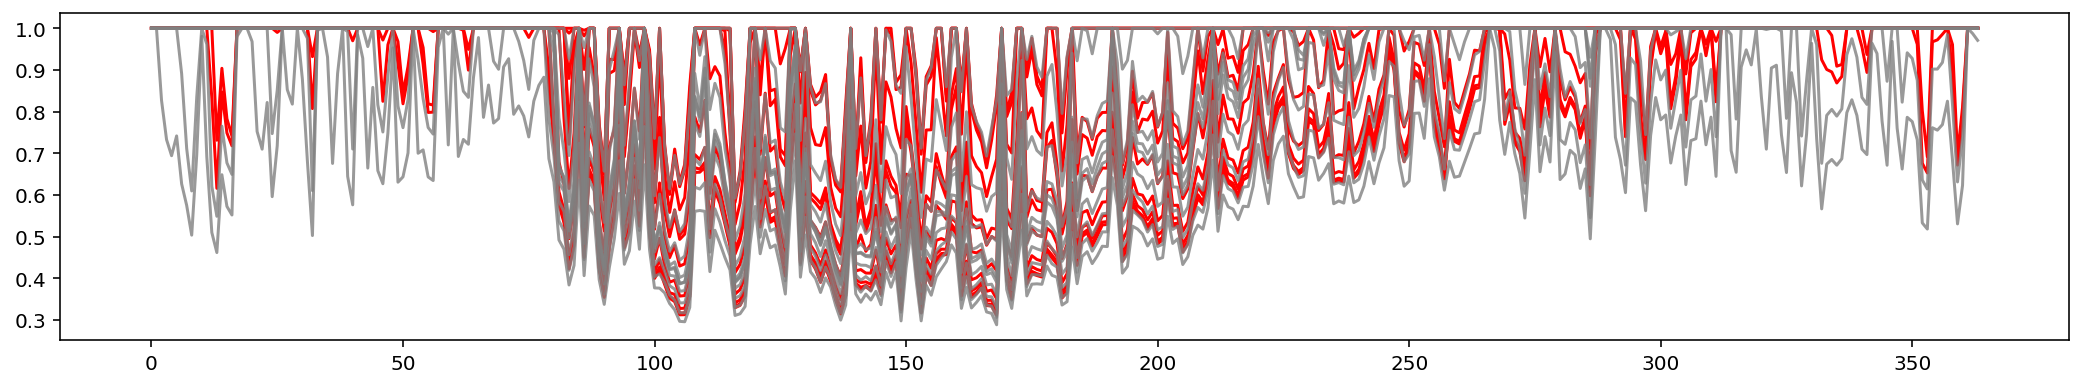

In [35]:
fig,ax = plt.subplots(1,1,figsize=(18,3))
#ELM
#ax.plot(fpg_pft_elm,c='red')
ax.plot(df_1R.variables['fpi_vr'][:].squeeze()[:,-365:-1].T,color='red',alpha=1.0)

#TAM
#for i in range(fpg_pft_tam.shape[0]):
#    ax.plot(fpg_pft_tam[i,:],c='grey',alpha=0.4)

ax.plot(df_3R.variables['fpi_vr'][0].squeeze()[:,-365:-1].T,color='grey',alpha=0.8)

#ax.plot(fpg_pft_tam[:,:].mean(axis=0),color='blue')
#ax.fill_between(x=range(fpg_pft_tam.shape[1]), y1=fpg_interval[0],y2=fpg_interval[1],facecolor='blue', alpha=0.5)

plt.show()

## Prepare data for UQ

In [37]:
data_out = np.array([lai_pft_tam[:,-1],frootc_pft_tam[:,-1],fpg_pft_tam[:,-1]]).T
data_out.shape

(32, 3)

In [38]:
pnames = ['frootlong_t','frootlong_a','frootlong_m',
         'fr_flab_t','fr_flab_a','fr_flab_m',
         'fr_flig_t','fr_flig_a','fr_flig_m',
         'fr_fcel_t','fr_fcel_a','fr_fcel_m',
         'gdd_crit','gdd_crit_gap',
         'mort_depth_efolding']

In [49]:
pmin = [3 ,0.5,0.13,0.25*0.5,0.25*0.5,0.25*0.5, 0.25*0.5,0.25*0.5,0.25*0.5, 0.5*0.5,0.5*0.5,0.5*0.5, 100, 200,0.3743*0.5]
pmax = [10,4,  1,   0.25*1.5,0.25*1.5,0.25*1.5, 0.25*1.5,0.25*1.5,0.25*1.5, 0.5*1.5,0.5*1.5,0.5*1.5, 700, 600,0.3743*2.5]

In [39]:
#parm_out 
good = []
for p in pnames:
    good.append(df_3R.variables[p][:,0])    
parm_out = np.array(good).T
parm_out.shape

(32, 15)

In [48]:
np.savetxt('ytrain.dat', data_out[0:int(32*0.8),:])
np.savetxt('yval.dat',   data_out[int(32*0.8):,:])
np.savetxt('ptrain.dat', parm_out[0:int(32*0.8),:])
np.savetxt('pval.dat',   parm_out[int(32*0.8):,:])

In [52]:
myoutput = open('param_range.txt','w')
for p in range(len(pnames)):
    myoutput.write(str(pmin[p])+' '+str(pmax[p])+'\n')
myoutput.close()